- застой: co
- недостаток: liv
- ветер: si, kid, bl, gb, st
- жар: liv, ht
- холод: sp

In [1]:
import pandas as pd

In [53]:
di = {'+':['co'],
    '__':['liv'],
    'w':['si', 'kid', 'bl', 'gb', 'st'],
    'жар':['liv', 'sp'],
    'холод':['kid']
    }

tabl = pd.DataFrame(
    data = 0,
    columns = ['Gb', 'Si', 'Th', 'St', 'Co', 'Bl', 'Liv', 'Ht', 'Hg', 'Sp', 'Lu', 'Kid'],
    index = ['+', '__', 'w', 'жар', 'холод', 'сухость', 'сырость']
)

for k in di.keys():
    for i in di[k]:
        i=i.capitalize()
        tabl.loc[k, i] = 1

tabl

,Gb,Si,Th,St,Co,Bl,Liv,Ht,Hg,Sp,Lu,Kid
+,0,0,0,0,1,0,0,0,0,0,0,0
__,0,0,0,0,0,0,1,0,0,0,0,0
w,1,1,0,1,0,1,0,0,0,0,0,1
жар,0,0,0,0,0,0,1,0,0,1,0,0
холод,0,0,0,0,0,0,0,0,0,0,0,1
сухость,0,0,0,0,0,0,0,0,0,0,0,0
сырость,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
tabl[tabl['liv'.capitalize()] == 1].index

Index(['__', 'жар'], dtype='object')

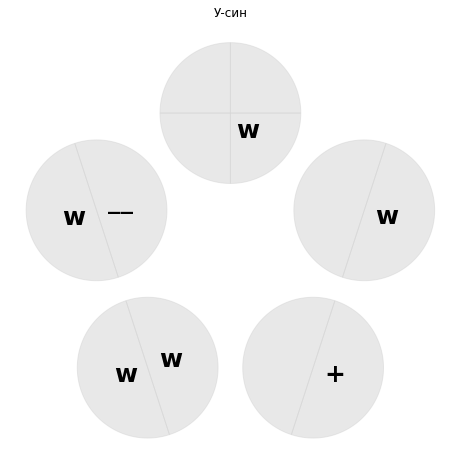

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Устанавливаем базовые параметры
num_vertices = 5
radius = 1
circle_radius = 0.05  # Радиус небольших кружков
colors = ['red', 'orange', 'grey', 'blue', 'green']  # Цвета для кружочков

# Генерируем случайные знаки и цвета
def random_sign(channel, patogen=None, table=tabl):
    try:
        return table[table[channel.capitalize()] == 1].index[0]
        
    except:
        return ''
    



# Функция для рисования секторов графа
def draw_sector(ax, center, radius, theta_start, theta_end, sign, patogen=None):
    # Угол в радианах
    theta = np.linspace(np.radians(theta_start), np.radians(theta_end), 100)
    x = np.append(center[0], center[0] + radius * np.cos(theta))
    y = np.append(center[1], center[1] + radius * np.sin(theta))

    # Заполняем сектор цветом
    color = random.choice(colors)  # Выбираем случайный цвет для кружка
    ax.fill(x, y, color='lightgrey', alpha=0.5)

    # Добавляем маленькие кружочки
    if patogen:
        circle_x = center[0] + radius * np.cos(np.radians((theta_start + theta_end) / 2)) * np.random.uniform(0.6, 0.7)
        circle_y = center[1] + radius * np.sin(np.radians((theta_start + theta_end) / 2)) * np.random.uniform(0.6, 0.7)
        ax.add_patch(plt.Circle((circle_x, circle_y), circle_radius, color=color))

    # Добавляем знак в центр сектора
    circle_x = center[0] + radius * np.cos(np.radians((theta_start + theta_end) / 2)) * np.random.uniform(0.3, 0.4)
    circle_y = center[1] + radius * np.sin(np.radians((theta_start + theta_end) / 2)) * np.random.uniform(0.3, 0.4)
    ax.text(circle_x, circle_y, sign, ha='center', va='center', fontsize=25, fontweight='bold')


# Создание графика
fig, ax = plt.subplots(figsize=(8, 8))
ax.axis('equal')  # Одинаковые масштабы по осям
ax.axis('off')  # Отключаем оси

# Открывающие углы для каждой вершины
angles = np.linspace(0, 360, num_vertices+1)

# Рисуем вершины: одна с 4 секторами, остальные с 2
draw_sector(ax, (np.sin(np.radians(angles[0])) * 2, np.cos(np.radians(angles[0])) * 2), radius, 0, 90, random_sign('th'))
draw_sector(ax, (np.sin(np.radians(angles[0])) * 2, np.cos(np.radians(angles[0])) * 2), radius, 90, 180, random_sign('hg'))
draw_sector(ax, (np.sin(np.radians(angles[0])) * 2, np.cos(np.radians(angles[0])) * 2), radius, 180, 270, random_sign('ht'))
draw_sector(ax, (np.sin(np.radians(angles[0])) * 2, np.cos(np.radians(angles[0])) * 2), radius, 270, 360, random_sign('si'))  # 4 сектора для первой вершины

draw_sector(ax, (np.sin(np.radians(angles[1])) * 2, np.cos(np.radians(angles[1])) * 2), radius, angles[1] + 0 * 180, angles[1] + (0 + 1) * 180, random_sign('sp'))
draw_sector(ax, (np.sin(np.radians(angles[1])) * 2, np.cos(np.radians(angles[1])) * 2), radius, angles[1] + 1 * 180, angles[1] + (1 + 1) * 180, random_sign('st'))

draw_sector(ax, (np.sin(np.radians(angles[2])) * 2, np.cos(np.radians(angles[2])) * 2), radius, angles[1] + 0 * 180, angles[1] + (0 + 1) * 180, random_sign('lu'))
draw_sector(ax, (np.sin(np.radians(angles[2])) * 2, np.cos(np.radians(angles[2])) * 2), radius, angles[1] + 1 * 180, angles[1] + (1 + 1) * 180, random_sign('co'))

draw_sector(ax, (np.sin(np.radians(angles[3])) * 2, np.cos(np.radians(angles[3])) * 2), radius, angles[4] + 0 * 180, angles[4] + (0 + 1) * 180, random_sign('kid'))
draw_sector(ax, (np.sin(np.radians(angles[3])) * 2, np.cos(np.radians(angles[3])) * 2), radius, angles[4] + 1 * 180, angles[4] + (1 + 1) * 180, random_sign('bl'))

draw_sector(ax, (np.sin(np.radians(angles[4])) * 2, np.cos(np.radians(angles[4])) * 2), radius, angles[4] + 0 * 180, angles[4] + (0 + 1) * 180, random_sign('liv'))
draw_sector(ax, (np.sin(np.radians(angles[4])) * 2, np.cos(np.radians(angles[4])) * 2), radius, angles[4] + 1 * 180, angles[4] + (1 + 1) * 180, random_sign('gb'))

# Отображаем график
plt.title("У-син")
plt.show()